# **Preprocess**

In [ ]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class Lang:
    def __init__(self, name):
        self.name = name #language name
        self.word2index = {}    #word to index
        self.word2count = {}    #count of each word
        self.index2word = {} #index to word
        self.n_words = 0 # total number of words
      

    def index_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words #get the index of the current word
            self.word2count[word] = 1   #initialise the count of the current word as 1
            self.index2word[self.n_words] = word #update index to word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [ ]:
path = "/content/drive/MyDrive/SheCodes/Dataset/Preprocessed_numpy_array_16"

lst = os.listdir(path)

label_list = []
array_list = []

for a in tqdm(lst):
  m = np.load(path + '/' + a)
  word = a.split('_')[1].split('.')[0]
  label_list.append(word)
  array_list.append(m)

hand_lang = Lang('hand')
for w in label_list:
  hand_lang.index_word(w)
print()
print(hand_lang.word2index)
print(hand_lang.word2count)

100%|██████████| 127/127 [00:00<00:00, 712.94it/s]


{'before': 0, 'candy': 1, 'computer': 2, 'drink': 3, 'go': 4}
{'before': 24, 'candy': 22, 'computer': 28, 'drink': 31, 'go': 22}


In [ ]:
y = []
for w in label_list:
  i = hand_lang.word2index[w]
  y.append(i)
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 1, 1, 3, 3, 4, 1, 1, 2, 3, 4, 0, 1, 3, 2, 3, 3, 1, 0]


In [ ]:
X = np.array(array_list)
y = np.array(y)
X.shape, y.shape

((127, 16, 2, 21, 3), (127,))

In [ ]:
seq_len = 16

In [ ]:
X = X.reshape((X.shape[0], seq_len, -1))
X.shape

(127, 16, 126)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 1,
       1, 3, 3, 4, 1, 1, 2, 3, 4, 0, 1, 3, 2, 3, 3, 1, 0])

In [ ]:
index_X = range(len(X))
index_dev = [3, 4, 24, 25, 41, 42, 66, 67, 89, 90]
index_test = [5, 6, 26, 27, 43, 44, 68, 69, 91, 92]
index_train = []
while i<len(X):
  if i not in index_dev and i not in index_test:
    index_train.append(i)
  i+=1

In [ ]:
X_train = [X[i] for i in index_train]
X_dev = [X[i] for i in index_dev]
X_test = [X[i] for i in index_test]

y_train = [y[i] for i in index_train]
y_dev = [y[i] for i in index_dev]
y_test = [y[i] for i in index_test]

In [ ]:
from sklearn.preprocessing import label_binarize
y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4])
y_dev = label_binarize(y_dev, classes=[0, 1, 2, 3, 4])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


In [ ]:
X_train = np.array(X_train)
X_dev = np.array(X_dev)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_dev = np.array(y_dev)
x_test = np.array(y_test)

In [ ]:
X_train.shape

(107, 16, 126)

# **Model**

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras import layers, models
from keras.models import Sequential
from keras import layers
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import random
from keras import optimizers
from keras.layers import SimpleRNN, Dense, Dropout
from keras.layers import Bidirectional
from keras.callbacks import Callback, ModelCheckpoint
import matplotlib.pyplot as plt
import os
import sys
import argparse
import itertools
from sklearn.metrics import confusion_matrix

In [ ]:
input_size = 2 * 21 * 3
hidden_size = 128
num_layers = 2
num_epochs = 50
batch_size = 16
learning_rate = 0.001

In [ ]:
def LSTMModel():
  model = Sequential()
  model.add(layers.LSTM(256, return_sequences=True, input_shape=(16, 126))) 
    
  model.add(layers.LSTM(128, return_sequences=True))
   
  model.add(layers.LSTM(64, return_sequences=True))
  model.add(layers.LSTM(16))
 
  model.add(layers.Dense(5, activation='softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
  return model

In [ ]:
model = LSTMModel()

checkpoint = ModelCheckpoint('model5.h5', monitor='val_acc', verbose=1, mode = 'max', save_best_only=True, save_weights_only=False, period=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16, 256)           392192    
_________________________________________________________________
lstm_1 (LSTM)                (None, 16, 128)           197120    
_________________________________________________________________
lstm_2 (LSTM)                (None, 16, 64)            49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense (Dense)                (None, 5)                 85        
Total params: 643,989
Trainable params: 643,989
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_dev, y_dev), callbacks = [checkpoint])

Epoch 1/50
7/7 [==============================] - 24s 397ms/step - loss: 1.6113 - acc: 0.2794 - val_loss: 1.5334 - val_acc: 0.3000

Epoch 00001: val_acc improved from -inf to 0.30000, saving model to model5.h5
Epoch 2/50
7/7 [==============================] - 1s 96ms/step - loss: 1.4131 - acc: 0.4054 - val_loss: 1.6139 - val_acc: 0.2000

Epoch 00002: val_acc did not improve from 0.30000
Epoch 3/50
7/7 [==============================] - 1s 95ms/step - loss: 1.4799 - acc: 0.3086 - val_loss: 1.6299 - val_acc: 0.2000

Epoch 00003: val_acc did not improve from 0.30000
Epoch 4/50
7/7 [==============================] - 1s 93ms/step - loss: 1.4421 - acc: 0.3843 - val_loss: 1.5343 - val_acc: 0.3000

Epoch 00004: val_acc did not improve from 0.30000
Epoch 5/50
7/7 [==============================] - 1s 94ms/step - loss: 1.3633 - acc: 0.3752 - val_loss: 1.5002 - val_acc: 0.2000

Epoch 00005: val_acc did not improve from 0.30000
Epoch 6/50
7/7 [==============================] - 1s 91ms/step - loss:

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


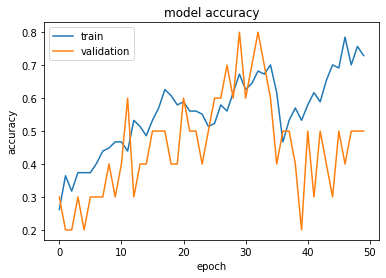

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

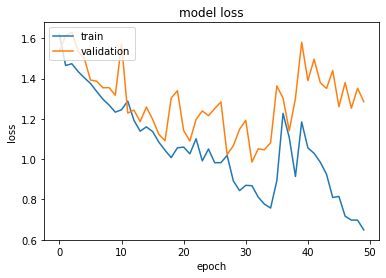

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('model5.h5')

# Test

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/SheCodes/Model/model.h5')
y_test_pred = model.predict(X_test)
y_test_pred_class = np.argmax(y_test_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
label_word = ['before', 'candy', 'computer', 'drink', 'go']
cm = confusion_matrix(y_test_class, y_test_pred_class)
cm = pd.DataFrame(cm, index=label_word, columns=label_word)
print("======CONFUSION MATRIX========")
print(cm)
print("Accuracy Score of the test set:", accuracy_score(y_test_class, y_test_pred_class))

======CONFUSION MATRIX========
          before  candy  computer  drink  go
before         2      0         0      0   0
candy          0      2         0      0   0
computer       0      0         2      0   0
drink          0      0         0      2   0
go             0      0         1      0   1
Accuracy Score of the test set: 0.9


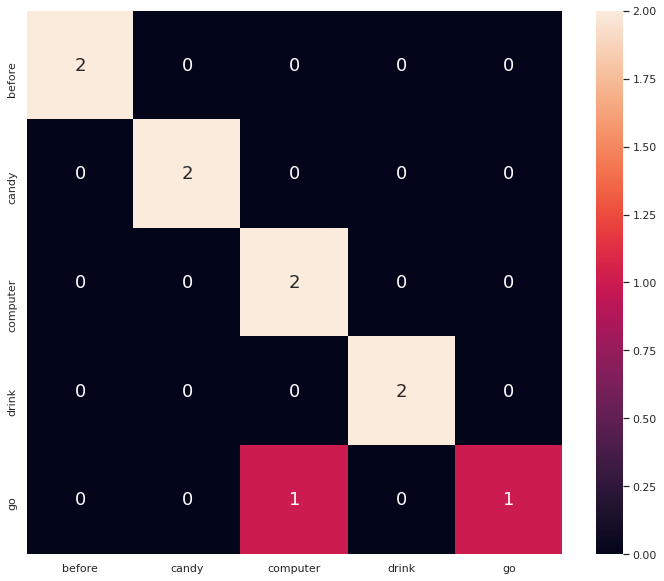

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()


f = plt.figure(figsize=(12, 10))
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
from tensorflow.keras.models import Model, load_model
model = load_model("/content/drive/MyDrive/SheCodes/Model/model.h5")
model.save('/content/drive/MyDrive/SheCodes/Model/modelfile')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SheCodes/Model/modelfile/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SheCodes/Model/modelfile/assets
